In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
df = pd.read_csv('../data/processed_data/all/resample_to_50_per_act/resample_to_50.csv')

In [3]:
df.tail()

,x,y,z,label,seg,suspicious
251295,-928.094685,163.788475,337.651526,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
251296,-946.717057,177.251312,326.688697,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
251297,-933.746906,167.946609,310.380039,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
251298,-910.344399,154.584634,309.409075,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
251299,-896.701663,143.548819,302.866383,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False


In [4]:
raw_x = df['x'].values
raw_y = df['y'].values
raw_z = df['z'].values
raw_x,raw_y,raw_z

(array([  20.        ,   47.14968151,   68.46329185, ..., -933.74690613,
        -910.3443994 , -896.70166338]),
 array([ 781.        ,  801.3817065 ,  807.90951065, ...,  167.94660922,
         154.58463444,  143.54881889]),
 array([-507.        , -493.33143392, -517.05789211, ...,  310.38003933,
         309.40907471,  302.866383  ]))

In [5]:
# FIR数字低通滤波器（未使用窗函数），滤除高频噪声

# 采样频率
fir_fs = 25
# 低通滤波器截止频率
fir_f = 5

# 以采样率fs为基准，归一化的低通截止频率
f_norm = fir_f/fir_fs
# 滤波器阶数为length-1
length = 201
fir_b = signal.remez(length, (0, f_norm-0.02,  f_norm,  0.50), (1, 0.01))
fir_a = 1
len(fir_b)

201

In [22]:
# 数字巴特沃斯低通滤波器（IIR数字滤波器的一种），滤除高频噪声

# 采样频率
iir_fs = 25
# 低通滤波器截止频率
iir_f = 10

# 模拟三阶巴特沃斯低通滤波器的系数
iir_b_ana, iir_a_ana = signal.butter(3, 2*np.pi*iir_f, analog=1)
# 数字三阶巴特沃斯低通滤波器（属于IIR）的系数
iir_b, iir_a = signal.bilinear(iir_b_ana,iir_a_ana,fs=iir_fs)
iir_b_ana,iir_a_ana,iir_b,iir_a

(array([ 248050.2134424]),
 array([  1.00000000e+00,   1.25663706e+02,   7.89568352e+03,
          2.48050213e+05]),
 array([ 0.22925293,  0.68775878,  0.68775878,  0.22925293]),
 array([ 1.        ,  0.41569149,  0.37912163,  0.03921031]))

In [23]:
fir_x = signal.lfilter(fir_b, fir_a, raw_x)
fir_y = signal.lfilter(fir_b, fir_a, raw_y)
fir_z = signal.lfilter(fir_b, fir_a, raw_z)
iir_x = signal.lfilter(iir_b, iir_a, raw_x)
iir_y = signal.lfilter(iir_b, iir_a, raw_y)
iir_z = signal.lfilter(iir_b, iir_a, raw_z)

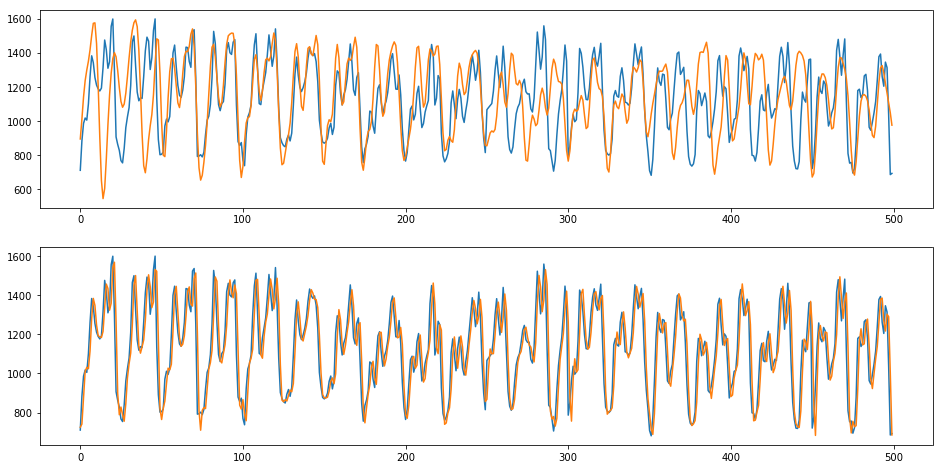

In [24]:
fig = plt.figure(figsize = (16,8))
fir_subfig = fig.add_subplot(211)
iir_subfig = fig.add_subplot(212)

fir_subfig.plot(raw_x[1000:1500])
fir_subfig.plot(fir_x[1000:1500])
iir_subfig.plot(raw_x[1000:1500])
iir_subfig.plot(iir_x[1000:1500])